In [11]:
# For Google Colab

""" from google.colab import drive
drive.mount('/content/drive', force_remount = True)

import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')

!pip install fastf1

"""

" from google.colab import drive\ndrive.mount('/content/drive', force_remount = True)\n\nimport sys\nsys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')\n\n!pip install fastf1\n\n"

In [12]:
import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import fastf1_race_util

In [13]:
session = fastf1.get_session(2025, 8, 'r')
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '1', '44', '6', '31', '30', '23', '55', '63', '87', '43', '5', '18', '27', '22', '12', '14', '10']


In [14]:
laps = session.laps.pick_quicklaps()
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()
# Get compound colors
compound_colors = fastf1.plotting.COMPOUND_COLORS
print('Compound colors', compound_colors)

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

drivers = session.drivers
driver_laps = session.laps.pick_drivers(drivers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

finishing_order = [session.get_driver(i)["Abbreviation"] for i in drivers]
print('Finishing order: ', finishing_order)
driver_colors = {}
for driver_abbr in driver_laps['Driver'].unique():
    color = fastf1.plotting.get_driver_color(driver_abbr, session)
    driver_colors[driver_abbr] = color

/home/fastf1_util_functions/fastf1/lib/python3.12/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: INCOMPATIBLE with 2025 season! COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"INCOMPATIBLE with 2025 season! {name} is deprecated "
/home/fastf1_util_functions/fastf1/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:249: FutureWarning: INCOMPATIBLE with 2025 season!The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("INCOMPATIBLE with 2025 season!The function `team_color` "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input ' bulls' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'kick sauber' to 'sauber'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


Compound colors {'SOFT': '#da291c', 'MEDIUM': '#ffd12e', 'HARD': '#f0f0ec', 'INTERMEDIATE': '#43b02a', 'WET': '#0067ad', 'UNKNOWN': '#00ffff', 'TEST-UNKNOWN': '#434649'}
Index(['McLaren', 'Ferrari', 'Red Bull Racing', 'Williams', 'Mercedes',
       'Racing Bulls', 'Aston Martin', 'Kick Sauber', 'Haas F1 Team',
       'Alpine'],
      dtype='object', name='Team')
Finishing order:  ['NOR', 'LEC', 'PIA', 'VER', 'HAM', 'HAD', 'OCO', 'LAW', 'ALB', 'SAI', 'RUS', 'BEA', 'COL', 'BOR', 'STR', 'HUL', 'TSU', 'ANT', 'ALO', 'GAS']


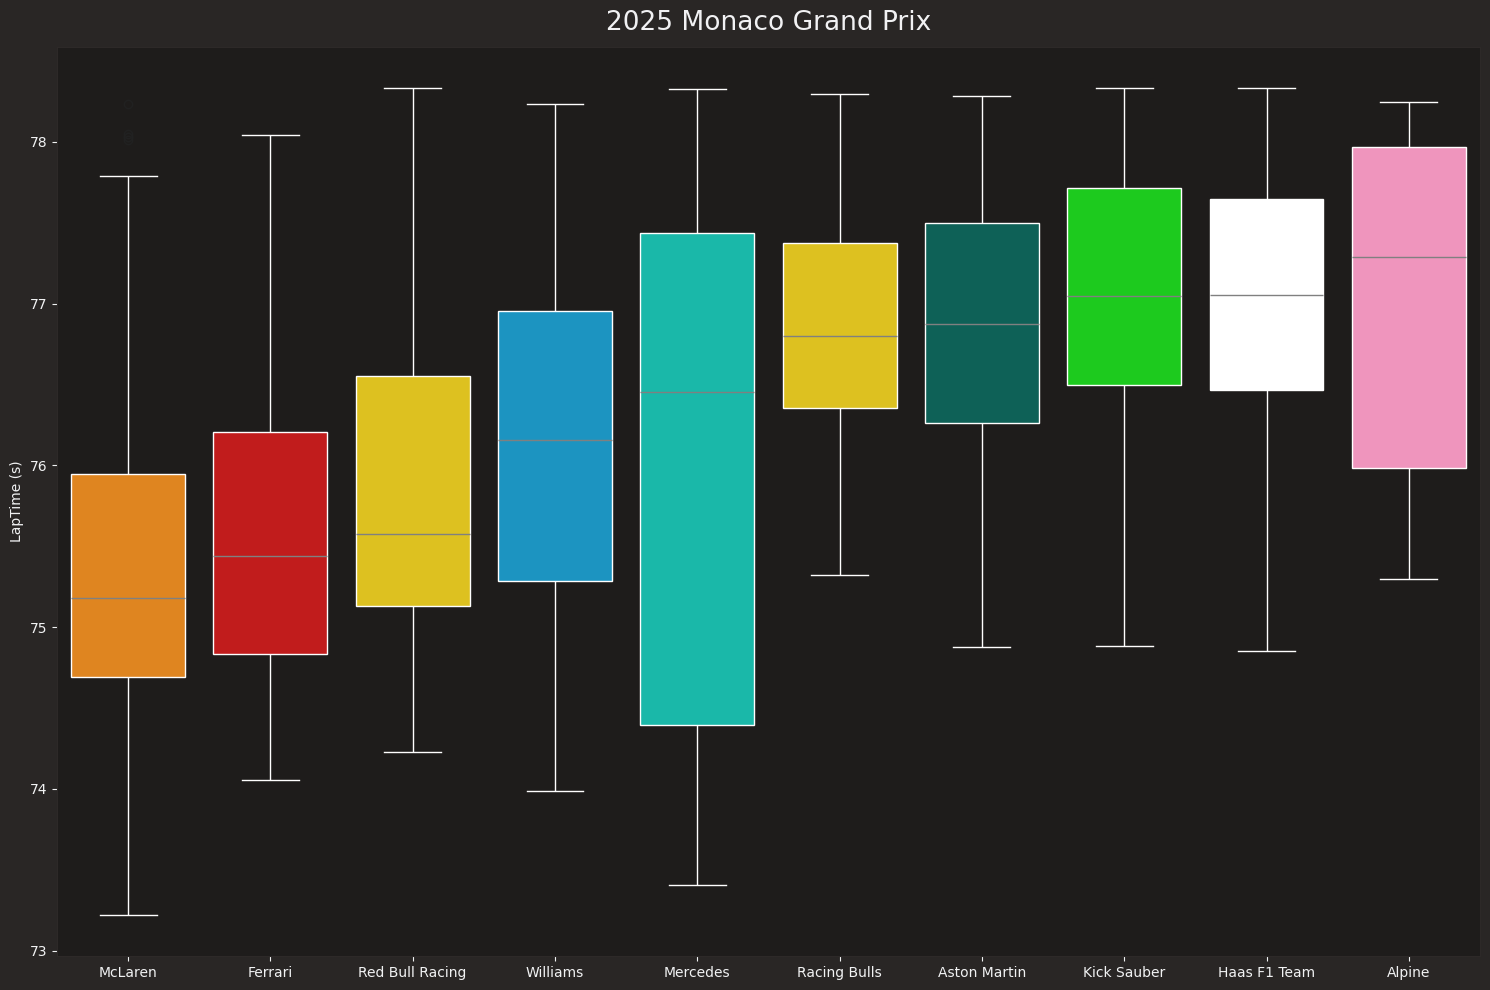

In [15]:
fastf1_util.plot_laptimes_boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    title="2025 Monaco Grand Prix"
)

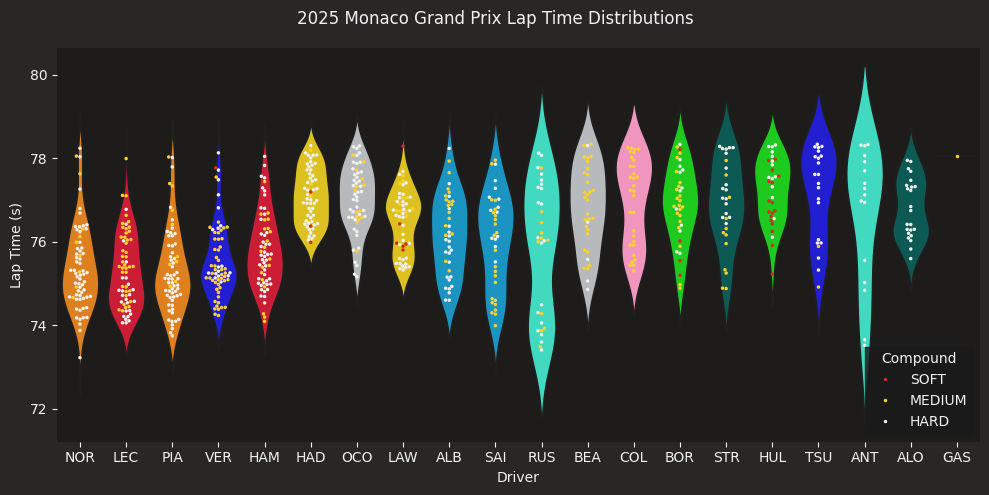

In [16]:
fastf1_util.plot_lap_time_distributions(
    driver_laps=driver_laps,
    finishing_order=finishing_order,
    driver_colors=driver_colors,
    compound_colors=compound_colors,
    title="2025 Monaco Grand Prix Lap Time Distributions",
    marker_size = 2.5
)

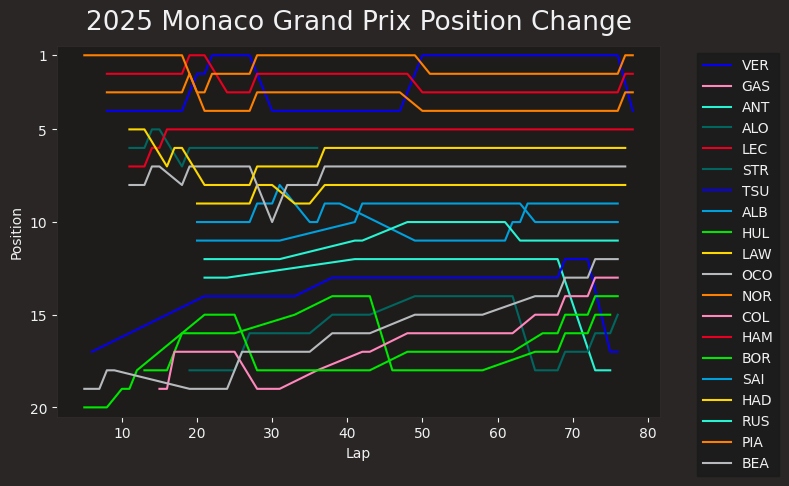

In [17]:
fastf1_util.plot_driver_positions(
    driver_laps,
    driver_colors,
    title="2025 Monaco Grand Prix Position Change")

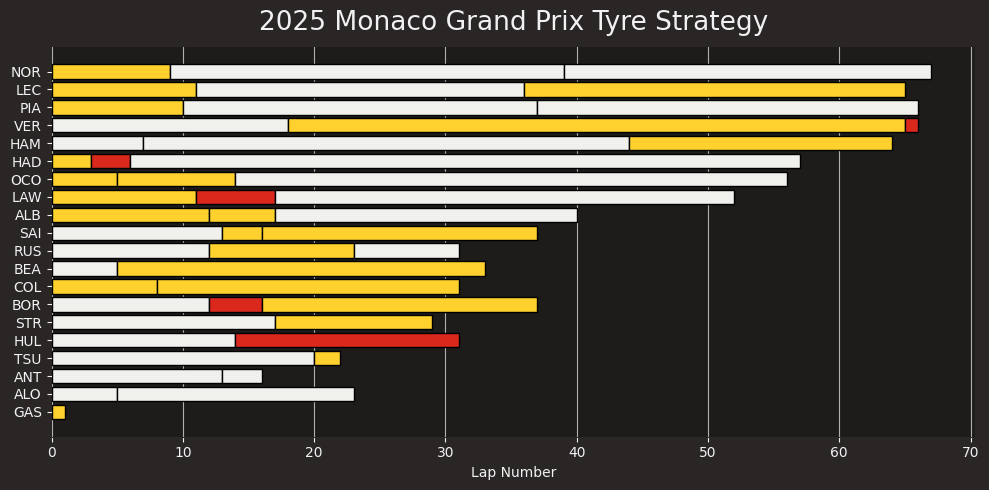

In [18]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})

fastf1_util.plot_tyre_strategy(
    finishing_order,
    stints,
    driver_colors,
    compound_colors,
    title="2025 Monaco Grand Prix Tyre Strategy")

/home/fastf1_util_functions/fastf1/lib/python3.12/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/fastf1_util_functions/fastf1/lib/python3.12/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/fastf1_util_functions/fastf1/lib/python3.12/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


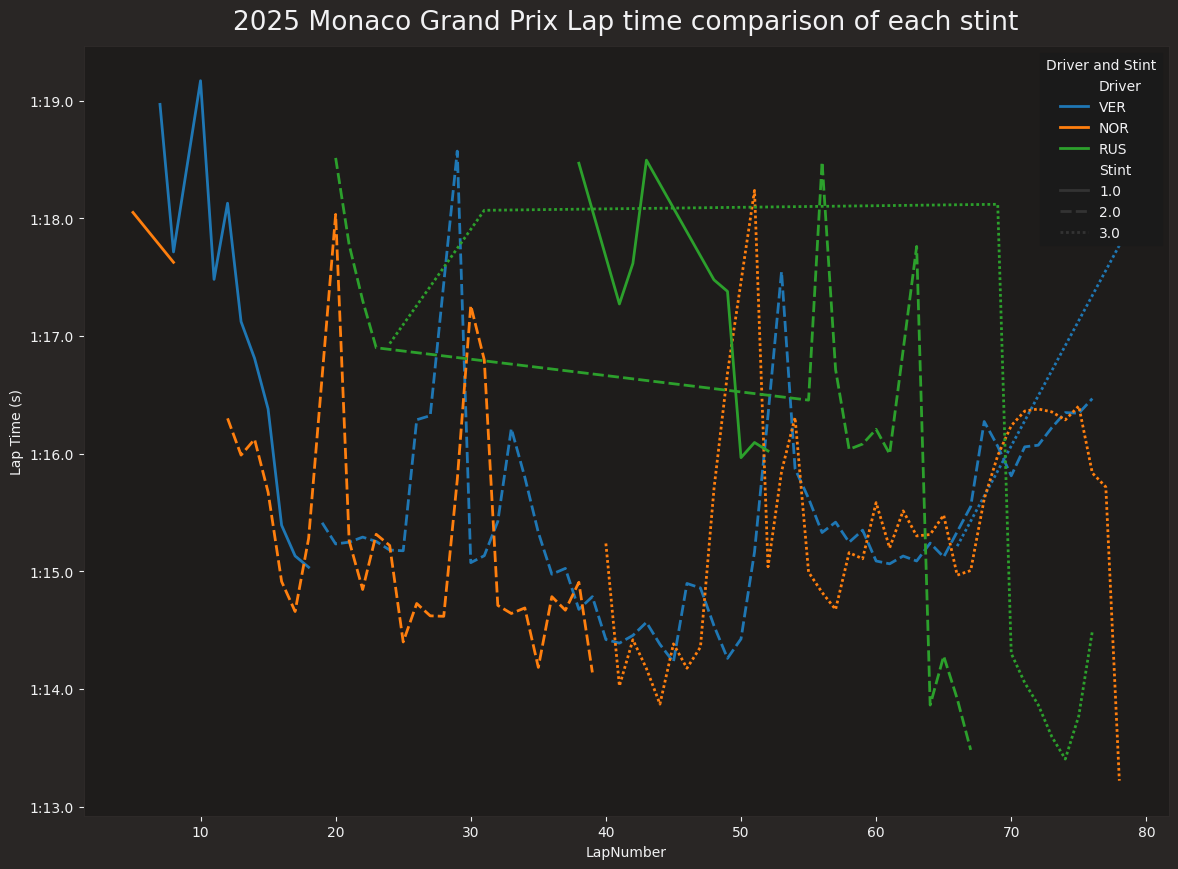

In [19]:
driver_list = ["VER", "NOR", "RUS"]
fastf1_util.plot_driver_laps(
    session,
    driver_list,
    stints,
    '2025 Monaco Grand Prix Lap time comparison of each stint')